Saving creditcard.csv to creditcard (1).csv
Dataset shape: (284807, 31)
Resampled dataset shape: (568630, 30) (568630,)

Training Logistic Regression...
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85295
           1       0.97      0.92      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



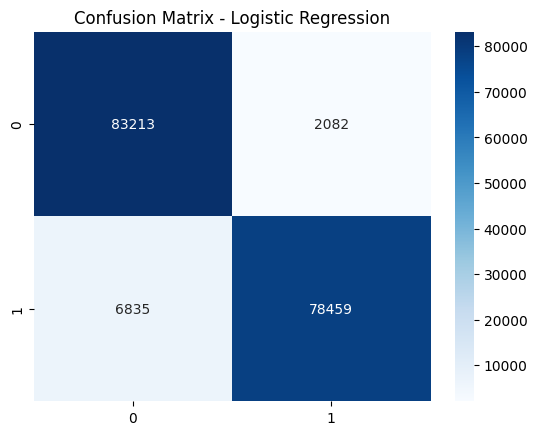


Training Random Forest...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



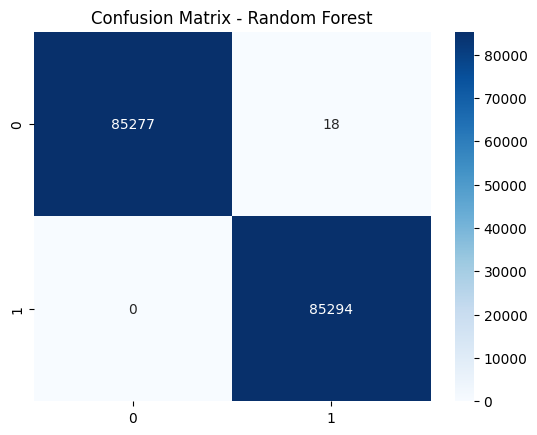


✅ Best model saved as best_fraud_model.pkl

🔮 Predictions on sample data: [1, 0, 0, 0, 0]
Actual labels: [1, 0, 0, 0, 0]


In [6]:
# ===============================
#  Fraud Detection ML Project
#  Ready-to-run Google Colab Code
# ===============================

# Step 1: Install & Import Libraries
!pip install imbalanced-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pickle

# Step 2: Upload Dataset
from google.colab import files
uploaded = files.upload()

# Load dataset (replace filename if needed)
df = pd.read_csv(list(uploaded.keys())[0])
print("Dataset shape:", df.shape)
df.head()

# Step 3: Preprocessing
X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X[["Time","Amount"]] = scaler.fit_transform(X[["Time","Amount"]])

# Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print("Resampled dataset shape:", X_res.shape, y_res.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# Step 4: Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Step 5: Save Best Model (Random Forest usually best)
best_model = models["Random Forest"]
with open("best_fraud_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("\n✅ Best model saved as best_fraud_model.pkl")

# Step 6: Prediction on New Data (example: first 5 rows)
X_new = X_test[:5]
y_true = y_test[:5]
y_pred = best_model.predict(X_new)

print("\n🔮 Predictions on sample data:", y_pred.tolist())
print("Actual labels:", y_true.tolist())



🔎 Model Performance Comparison:

                 Model  Precision    Recall  F1-Score
0  Logistic Regression   0.974150  0.919865  0.946230
1        Random Forest   0.999789  1.000000  0.999894


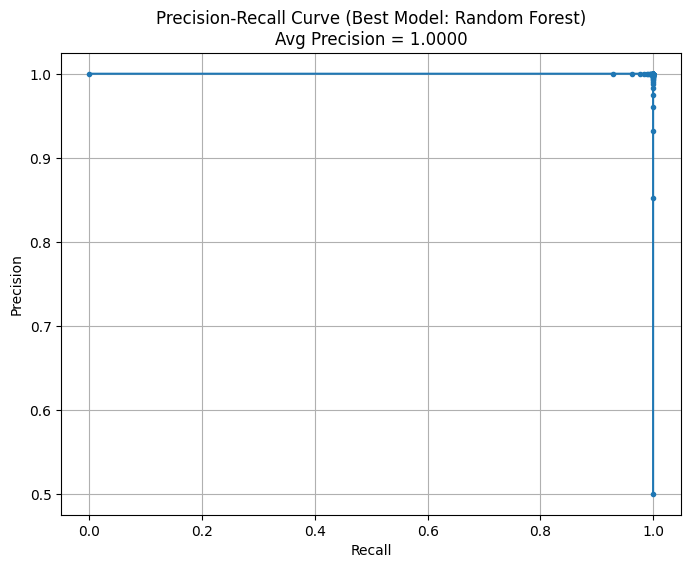


✅ Final Conclusion: The best performing model is **Random Forest** based on overall fraud detection (F1-Score).


In [7]:
# ===============================
# 📊 Final Summary Report
# ===============================

from sklearn.metrics import precision_score, recall_score, f1_score

summary = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    summary.append([name, precision, recall, f1])

# Create summary DataFrame
summary_df = pd.DataFrame(summary, columns=["Model", "Precision", "Recall", "F1-Score"])
print("\n🔎 Model Performance Comparison:\n")
print(summary_df)

# Plot Precision-Recall Curve for best model (Random Forest)
from sklearn.metrics import precision_recall_curve, average_precision_score

y_scores = best_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.')
plt.title(f"Precision-Recall Curve (Best Model: Random Forest)\nAvg Precision = {avg_precision:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

# 🔔 Final Conclusion
best_model_name = summary_df.sort_values(by="F1-Score", ascending=False).iloc[0]["Model"]
print(f"\n✅ Final Conclusion: The best performing model is **{best_model_name}** "
      f"based on overall fraud detection (F1-Score).")
